# Statistik om Iris blommor

Import av bibliotek

In [85]:
import numpy as np
import pandas as pd
import scipy.stats as scs
import seaborn as sns
import matplotlib.pyplot as plt

### Läsa in datasetet

In [86]:
iris_data = pd.read_csv('../Data/iris.csv')

# Using rename() to remove blank spaces
iris_data.rename(columns={" sepal_width": "sepal_width", " petal_length": "petal_length", " petal_width": "petal_width", " class": "class"}, inplace=True)
iris_data.head()


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Lägesmått eller mått på centraltendens

Av nedan deskriptiva mått kan vi se att vi har 150 datapunkter, medelvärde på irisblommors bägarblads längd på 5,8 cm och bredd på 3,05 cm. Kronbladen däremot har en medellängd på 3,76 cm och bredd på 1.20 cm. Funktionen ger även information om min och max, kvartilerna (25%, 50%, och 75 %) och standardavvikelen (std).

In [87]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Typvärde

Genom att använda oss av nedan funktion 'mode()' får vi informationen om typvärdet som består av tre sortes Irisblommor, genom att sedan räkna antal värden får vi informationen om att samtliga ingående sorter i datasetet av isisblomman är typvärden. Det visas även tydligt i histogrammet nedan.

In [88]:
iris_data['class'].mode()

0        Iris-setosa
1    Iris-versicolor
2     Iris-virginica
Name: class, dtype: object

In [89]:
iris_data['class'].value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

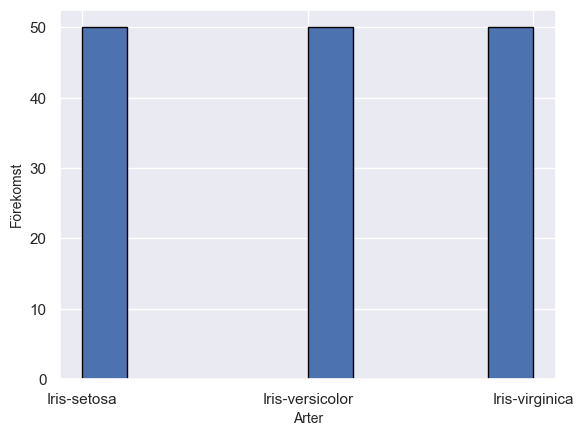

In [90]:
plt.hist(iris_data['class'],edgecolor = 'black')
plt.xlabel('Arter',fontsize =10)
plt.ylabel('Förekomst',fontsize=10)
plt.show()

1. Artjämförelse:

Forskningsfråga: Skiljer sig olika arter av irisblommor (Setosa, Versicolor, Virginica) signifikant åt när det gäller deras bägarblads- och kronbladsegenskaper?

Hypotes: Det finns signifikanta skillnader i bägarblads- och kronbladsegenskaper (t.ex. längd och bredd) bland de tre irisarterna.

In [91]:
setosa = iris_data[iris_data['class']=="Iris-setosa"]
versicolor = iris_data[iris_data['class']=="Iris-versicolor"]
virginica = iris_data[iris_data['class']=="Iris-virginica"]

print(f"\nSetosa:\n {setosa.describe()}")
print(f"\nVersicolor:\n {versicolor.describe()}")
print(f"\nVirginica:\n {virginica.describe()}")


Setosa:
        sepal_length  sepal_width  petal_length  petal_width
count      50.00000    50.000000     50.000000     50.00000
mean        5.00600     3.418000      1.464000      0.24400
std         0.35249     0.381024      0.173511      0.10721
min         4.30000     2.300000      1.000000      0.10000
25%         4.80000     3.125000      1.400000      0.20000
50%         5.00000     3.400000      1.500000      0.20000
75%         5.20000     3.675000      1.575000      0.30000
max         5.80000     4.400000      1.900000      0.60000

Versicolor:
        sepal_length  sepal_width  petal_length  petal_width
count     50.000000    50.000000     50.000000    50.000000
mean       5.936000     2.770000      4.260000     1.326000
std        0.516171     0.313798      0.469911     0.197753
min        4.900000     2.000000      3.000000     1.000000
25%        5.600000     2.525000      4.000000     1.200000
50%        5.900000     2.800000      4.350000     1.300000
75%        6.300

Från ovan kod kan vi utläsa att bägarbladens längd och bredd skiljer sig väsentligt om man kollar på dess medelvärden. Setosas blad har i genomsnitt en kortare längd men bredare blad, Virinica har däremot i genomsnitt en längre blad men är då lite smalare. Versicolor beginner sig mellan de båda gällande både längd och bredd. Det mönstret syns även i nedan diagram där samtliga datapunkter representeras.

Vad gäller kronbladen ser vi däremot att setosa är allra minst i genomsnitt av de tre, Versicolor är generellt sätt större och bredare och Virinica har både längst och bredast medelvärde av de tre sorterna. Nedan diagram visar samtliga datapunkter.

<Figure size 1000x600 with 0 Axes>

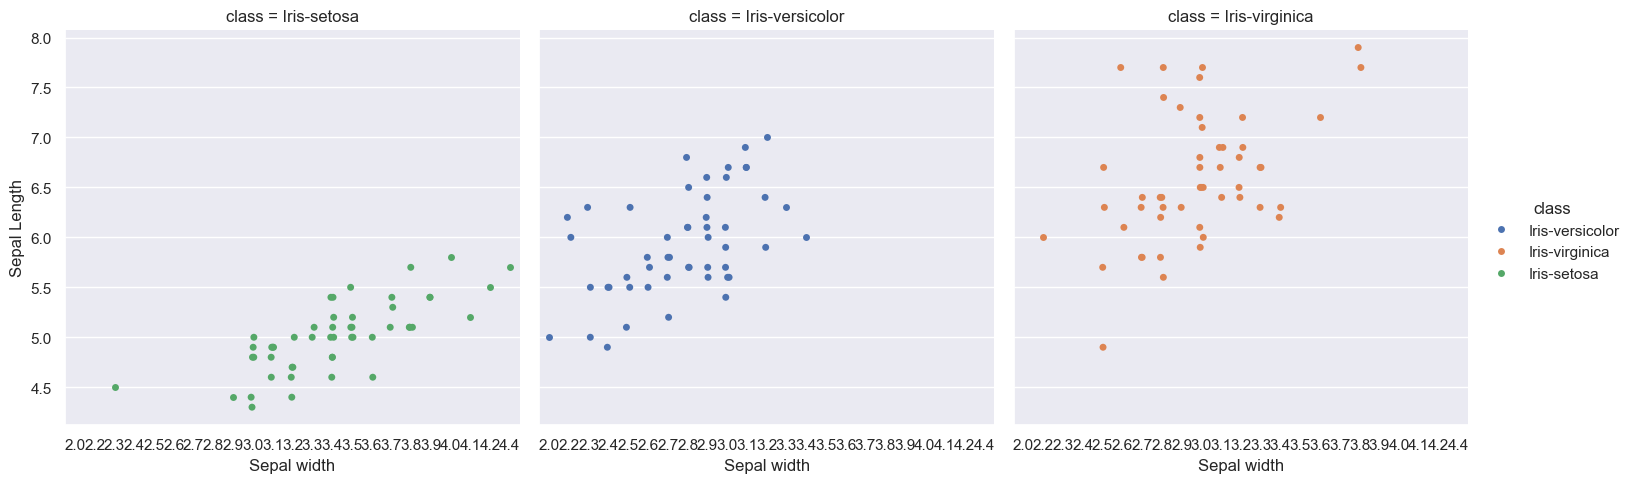

In [92]:
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
sns.catplot(iris_data, 
              x='sepal_width', 
              y='sepal_length',
              hue='class',
              col='class',
              ).set_xlabels('Sepal width').set_ylabels('Sepal Length')


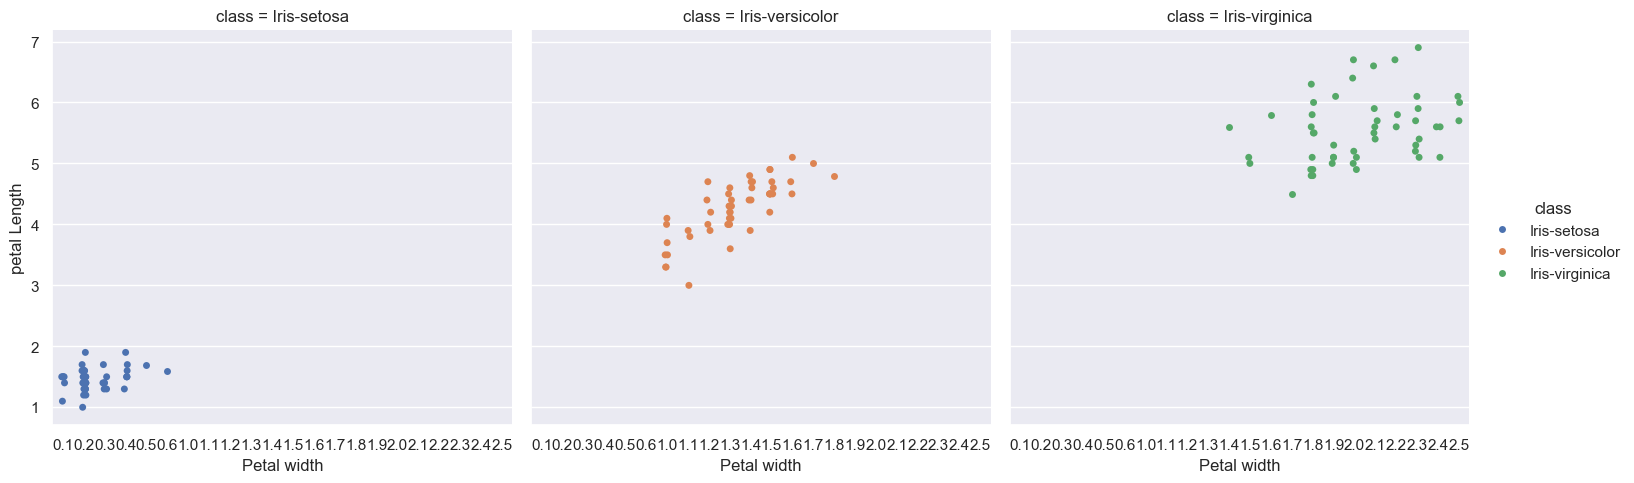

In [94]:
sns.catplot(iris_data, 
              x='petal_width', 
              y='petal_length',
              hue='class',
              col='class',
              ).set_xlabels('Petal width'). set_ylabels('petal Length')

In [101]:
setosa_petal_length_std = setosa['petal_length'].std()
setosa_petal_width_std = setosa['petal_width'].std()
versicolor_petal_length_std = versicolor['petal_length'].std()
versicolor_petal_width_std = versicolor['petal_width'].std()
virginica_petal_length_std = virginica['petal_length'].std()
virginica_petal_width_std = virginica['petal_width'].std()
setosa_sepal_length_std = setosa['sepal_length'].std()
setosa_sepal_width_std = setosa['sepal_width'].std()
versicolor_sepal_length_std = versicolor['sepal_length'].std()
versicolor_sepal_width_std = versicolor['sepal_width'].std()
virginica_sepal_length_std = virginica['sepal_length'].std()
virginica_sepal_width_std = virginica['sepal_width'].std()

print(f"Setosas bägarblads längds standardavvikelse är {setosa_sepal_length_std:.2f} och bredd är {setosa_sepal_width_std:.2f}.")
print(f"Setosas kronblads längds standardavvikelse är {setosa_petal_length_std:.2f} och bredd är {setosa_petal_width_std:.2f}.")
print()
print(f"Versicolor bägarblads längds standardavvikelse är {versicolor_sepal_length_std:.2f} och bredd är {versicolor_sepal_width_std:.2f}.")
print(f"Versicolor kronblads längds standardavvikelse är {versicolor_petal_length_std:.2f} och bredd är {versicolor_petal_width_std:.2f}.")
print()
print(f"Virginica bägarblads längds standardavvikelse är {virginica_sepal_length_std:.2f} och bredd är {versicolor_sepal_width_std:.2f}.")
print(f"Virginica kronblads längds standardavvikelse är {virginica_petal_length_std:.2f} och bredd är {versicolor_petal_width_std:.2f}.")


Setosas bägarblads längds standardavvikelse är 0.35 och bredd är 0.38.
Setosas kronblads längds standardavvikelse är 0.17 och bredd är 0.11.

Versicolor bägarblads längds standardavvikelse är 0.52 och bredd är 0.31.
Versicolor kronblads längds standardavvikelse är 0.47 och bredd är 0.20.

Virginica bägarblads längds standardavvikelse är 0.64 och bredd är 0.31.
Virginica kronblads längds standardavvikelse är 0.55 och bredd är 0.20.


In [96]:
# Calculate the confidence interval for a specific feature (e.g., sepal length) and species
confidence_interval = scs.t.interval(0.95, len(iris_data[iris_data['class'] == 'Iris-setosa']), loc=np.mean(iris_data[iris_data['class'] == 'Iris-setosa']['sepal_length']), scale=stats.sem(iris_data[iris_data['class'] == 'Iris-setosa']['sepal_length']))

# The confidence_interval variable now contains the lower and upper bounds of the confidence interval.
print("Confidence Interval for Sepal Length (Setosa):", confidence_interval)


NameError: name 'stats' is not defined

In [ ]:
# Perform a t-test to compare the means of sepal length between Setosa and Versicolor
t_stat, p_value = scs.ttest_ind(iris_data[iris_data['class'] == 'Iris-setosa']['sepal_area'], iris_data[iris_data['class'] == 'Iris-versicolor']['sepal_area'])

# Kolla p-värdet för att avgöra om det finns en signifikant skillnad på sorterna
if p_value < 0.05:
    print("Förkasta nollhypotesen: Det finns en signifikant skillnad.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference.")


Fail to reject the null hypothesis: There is no significant difference.
